## Final Project Submission

Please fill out:
* Student name: Jon
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.api as sm

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [5]:
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [6]:
df = df.dropna().reset_index()

In [7]:
df.date.head()

0     5/24/2022
1    12/13/2021
2     9/29/2021
3    12/14/2021
4     8/24/2021
Name: date, dtype: object

In [8]:
df.describe()


,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,30111.000000,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,15078.655342,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872
std,8705.253735,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073
min,0.000000,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,7538.500000,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075
50%,15080.000000,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790
75%,22617.500000,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394
max,30154.000000,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [9]:
df.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [10]:
df.condition

0           Good
1        Average
2        Average
3        Average
4        Average
          ...   
30106       Good
30107    Average
30108    Average
30109    Average
30110    Average
Name: condition, Length: 30111, dtype: object

In [11]:
df_colwanted = df.drop(['date', 
                        'view', 
                        'sqft_above',
                        'sqft_basement', 
                        'yr_renovated', 
                        'address', 
                        'lat', 
                        'long',
                        'id'
                       ], axis=1)

In [12]:
df_colwanted.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,heat_source,sewer_system,sqft_garage,sqft_patio,yr_built
0,0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,Good,7 Average,Gas,PUBLIC,0,40,1969
1,1,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,Average,7 Average,Oil,PUBLIC,0,240,1950
2,2,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,Average,7 Average,Gas,PUBLIC,0,0,1956
3,3,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,Average,9 Better,Gas,PUBLIC,200,270,2010
4,4,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,Average,7 Average,Electricity,PUBLIC,550,30,2012


<AxesSubplot:>

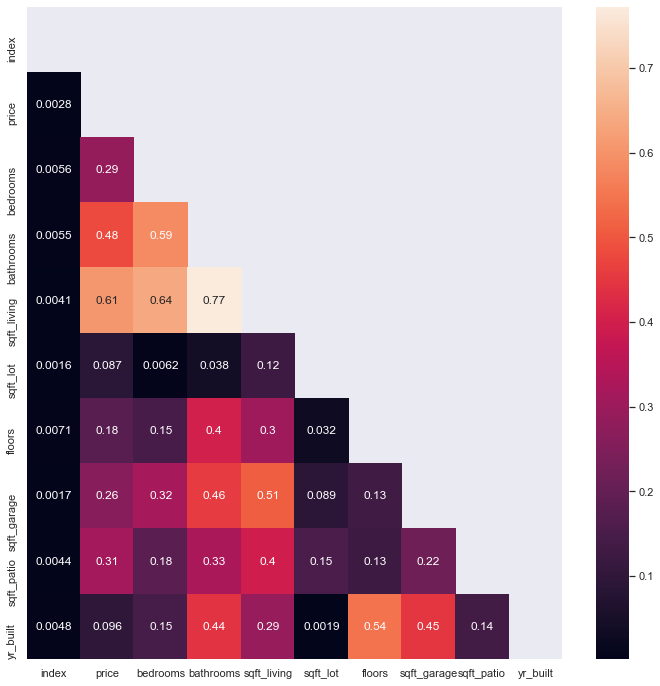

In [13]:
sns.set(rc={'figure.figsize':(12, 12)})

# Use the .heatmap function to depict the relationships visually!
mask  = np.triu(np.ones_like(df_colwanted.corr()))
sns.heatmap(abs(df_colwanted.corr()), annot=True, mask=mask)

In [14]:
list(df_colwanted.columns)

['index',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'greenbelt',
 'nuisance',
 'condition',
 'grade',
 'heat_source',
 'sewer_system',
 'sqft_garage',
 'sqft_patio',
 'yr_built']

In [15]:
#sns.pairplot(df[['price', 'sqft_living', 'sqft_lot', 'sqft_patio']])

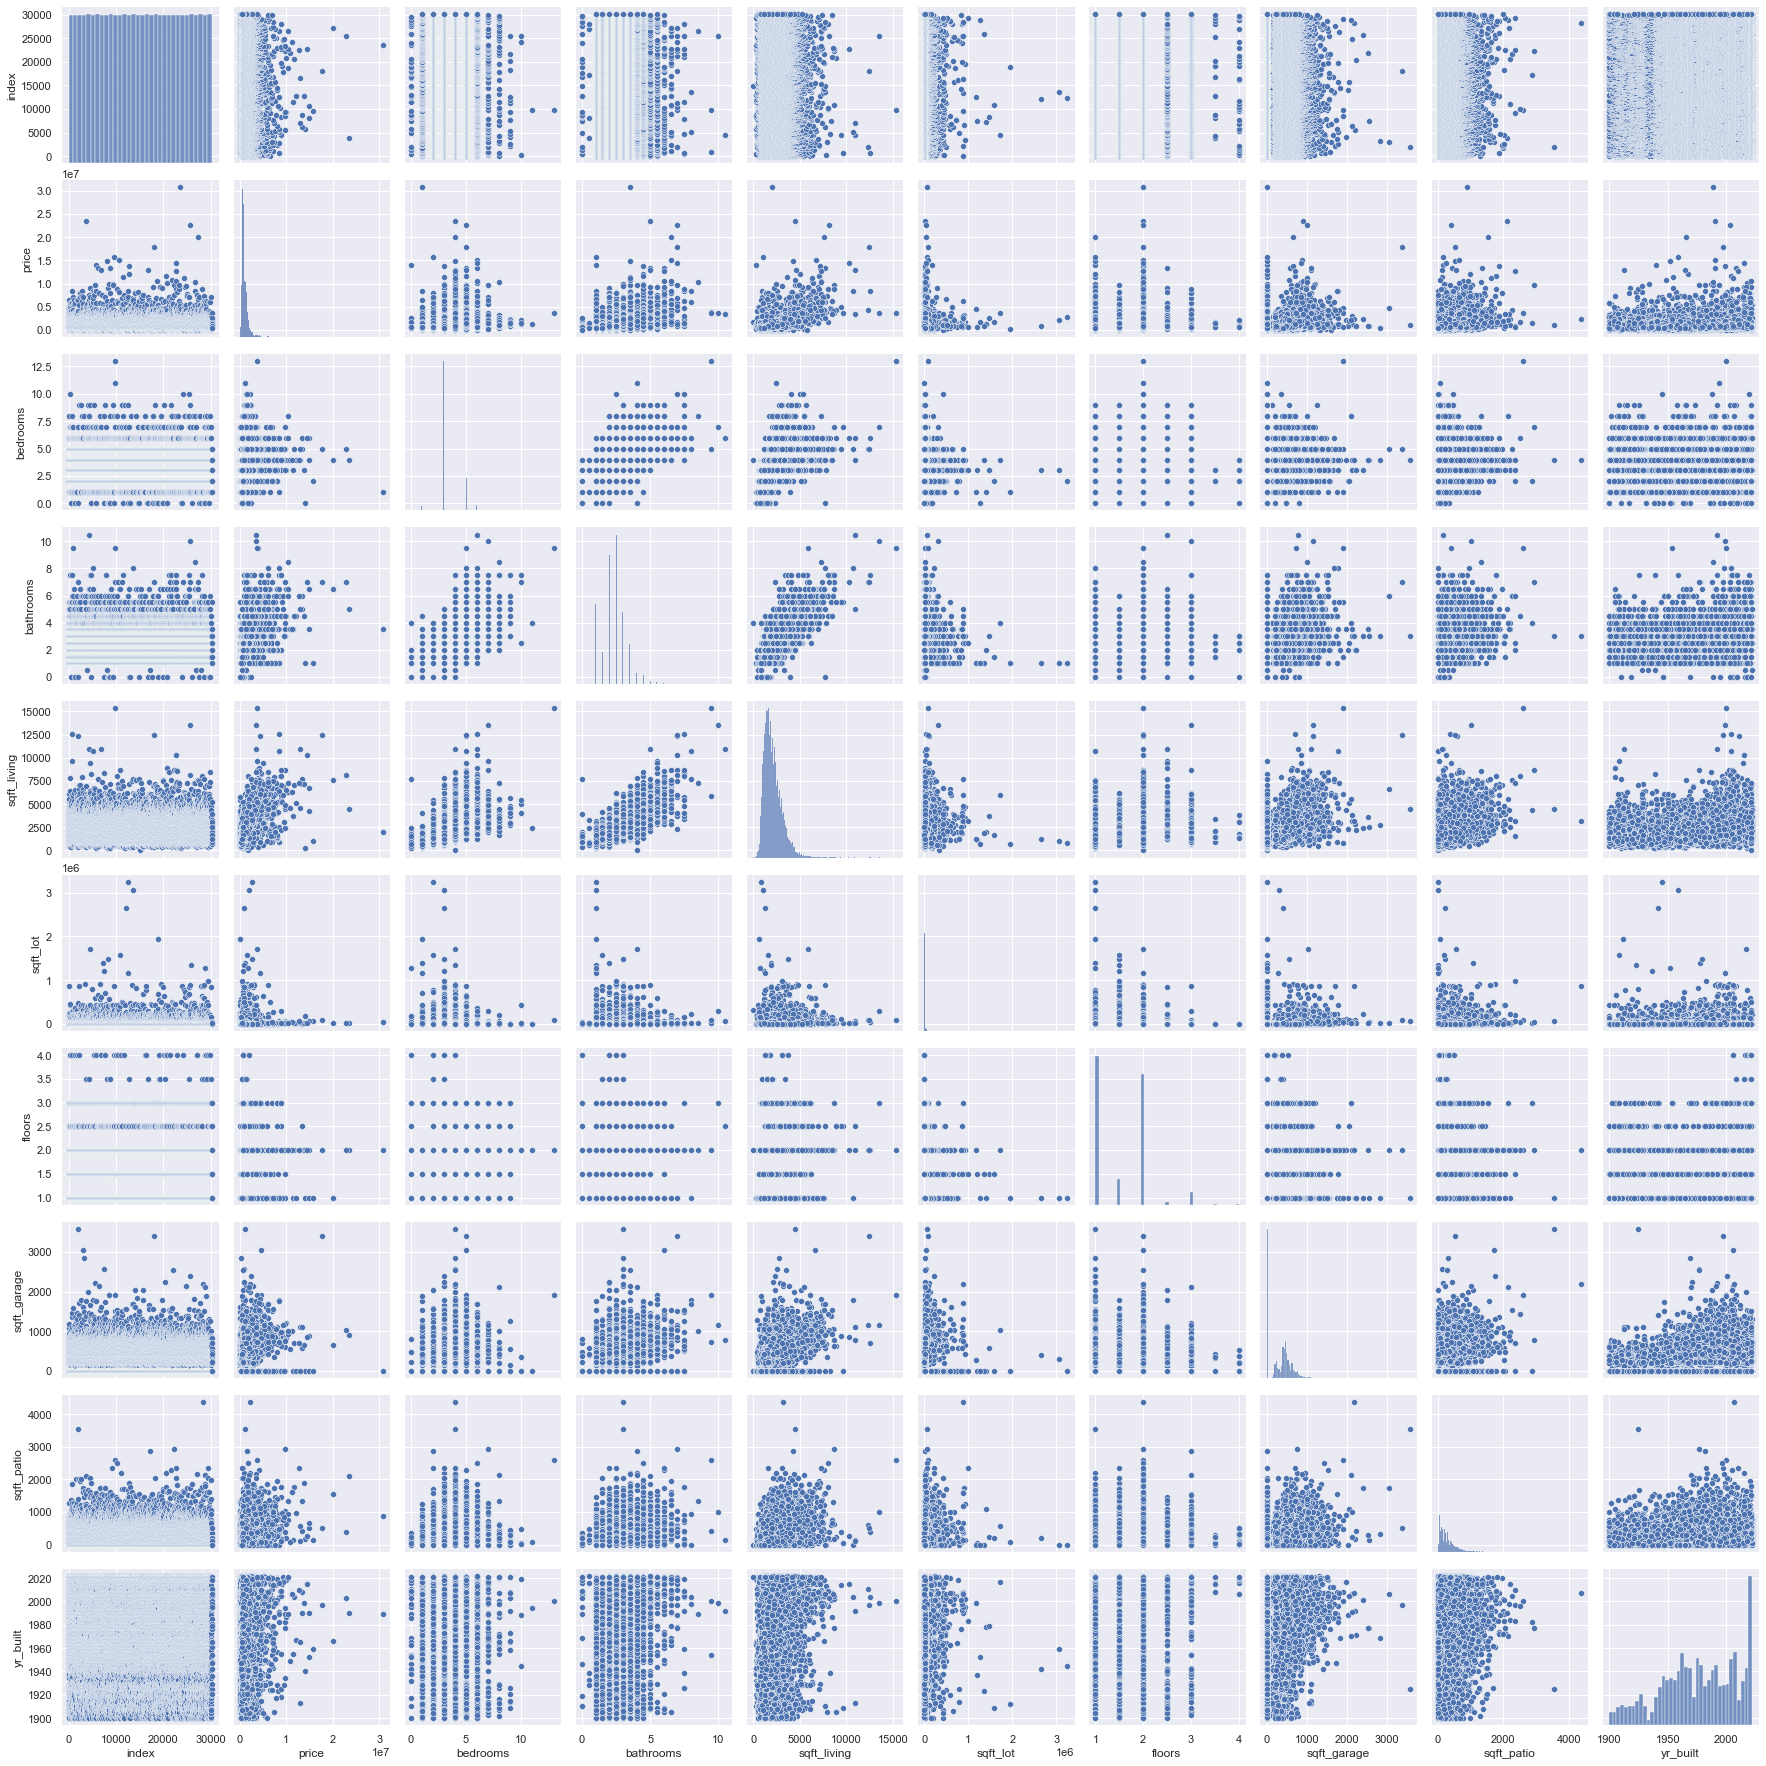

In [65]:
sns.pairplot(df_colwanted)

<AxesSubplot:xlabel='price', ylabel='Count'>

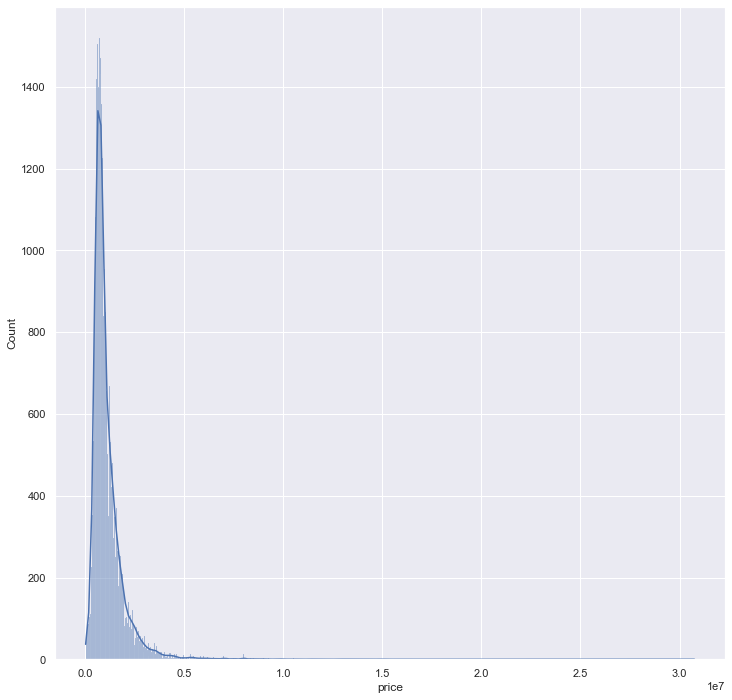

In [17]:
sns.histplot(df_colwanted.price, kde=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

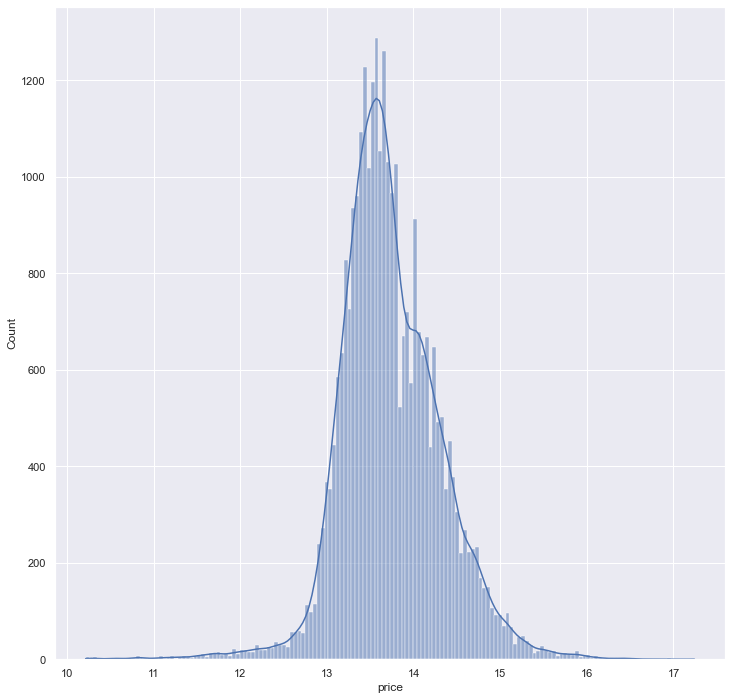

In [18]:
#logscaling target
y_scld = np.log(df_colwanted.price)
sns.histplot(y_scld, kde=True)

In [19]:
y = df.price
X = df[['sqft_living', 'sqft_lot', 'sqft_patio']]

In [20]:
model_base = sm.OLS(y, sm.add_constant(X))
results_base = model_base.fit()
results_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     6064.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:57:26   Log-Likelihood:            -4.4832e+05
No. Observations:               30111   AIC:                         8.966e+05
Df Residuals:                   30107   BIC:                         8.967e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.759e+04   9751.208     -7.956      0.000   -9.67e+04   -5.85e+04
sqft_living   528.9107      4.575    115.605      0.000     519.943     537.878
sqft_lot        0.0464      0.069      0.672      0.502      -0.089       0.182
sqft_patio    312.7786     18.239     17.149      0.000     277.029     348.528
==============================================================================
Omnibus:                    43140.750   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         45972551.037
Skew:                           8.106   Prob(JB):                         0.00
Kurtosis:                     193.734   Cond. No.                     1.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#logscaled target model
model_yscld = sm.OLS(y_scld, sm.add_constant(X))
results_yscld_base = model_yscld.fit()
results_yscld_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     6462.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:57:26   Log-Likelihood:                -18944.
No. Observations:               30111   AIC:                         3.790e+04
Df Residuals:                   30107   BIC:                         3.793e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9485      0.006   2070.495      0.000      12.936      12.961
sqft_living     0.0004   2.93e-06    120.629      0.000       0.000       0.000
sqft_lot     6.312e-09   4.43e-08      0.143      0.887   -8.05e-08    9.31e-08
sqft_patio      0.0002   1.17e-05     15.311      0.000       0.000       0.000
==============================================================================
Omnibus:                     5961.142   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50165.584
Skew:                          -0.718   Prob(JB):                         0.00
Kurtosis:                       9.158   Cond. No.                     1.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#logscaled target model
model_yscld = sm.OLS(y_scld, sm.add_constant(X.drop('sqft_patio', axis=True)))
results_yscld_base = model_yscld.fit()
results_yscld_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     9502.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:57:26   Log-Likelihood:                -19061.
No. Observations:               30111   AIC:                         3.813e+04
Df Residuals:                   30108   BIC:                         3.815e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9495      0.006   2062.813      0.000      12.937      12.962
sqft_living     0.0004   2.72e-06    136.571      0.000       0.000       0.000
sqft_lot     8.526e-08   4.42e-08      1.931      0.053   -1.28e-09    1.72e-07
==============================================================================
Omnibus:                     5890.229   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49985.559
Skew:                          -0.704   Prob(JB):                         0.00
Kurtosis:                       9.153   Cond. No.                     1.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
X_new = df[['sqft_living', 'bathrooms']]

In [24]:
#logscaled target model
newmodel_yscld = sm.OLS(y_scld, sm.add_constant(X_new))
newresults_yscld_base = newmodel_yscld.fit()
newresults_yscld_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     9630.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:57:26   Log-Likelihood:                -18983.
No. Observations:               30111   AIC:                         3.797e+04
Df Residuals:                   30108   BIC:                         3.800e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.8998      0.007   1745.129      0.000      12.885      12.914
sqft_living     0.0003   4.24e-06     78.014      0.000       0.000       0.000
bathrooms       0.0589      0.005     12.680      0.000       0.050       0.068
==============================================================================
Omnibus:                     5755.742   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49708.223
Skew:                          -0.677   Prob(JB):                         0.00
Kurtosis:                       9.147   Cond. No.                     7.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
sorted(list(df.bathrooms.unique()))

[0.0,
 0.5,
 1.0,
 1.5,
 2.0,
 2.5,
 3.0,
 3.5,
 4.0,
 4.5,
 5.0,
 5.5,
 6.0,
 6.5,
 7.0,
 7.5,
 8.0,
 8.5,
 9.5,
 10.0,
 10.5]

In [26]:
ohe = OneHotEncoder(drop='first')


In [27]:
ohe.fit(df[['bathrooms']])

OneHotEncoder(drop='first')

In [28]:
ohe_bath = pd.DataFrame(ohe.transform(df[['bathrooms']]).todense(), columns=ohe.get_feature_names())

In [29]:
ohe_bath.head()

,x0_0.5,x0_1.0,x0_1.5,x0_2.0,x0_2.5,x0_3.0,x0_3.5,x0_4.0,x0_4.5,x0_5.0,x0_5.5,x0_6.0,x0_6.5,x0_7.0,x0_7.5,x0_8.0,x0_8.5,x0_9.5,x0_10.0,x0_10.5
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
X_new.drop('bathrooms', axis=1, inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
X_new.head()

,sqft_living
0,1180
1,2770
2,2880
3,2160
4,1120


In [32]:
X_new = pd.concat([X,ohe_bath], axis=1)

In [33]:
X_new.head()

,sqft_living,sqft_lot,sqft_patio,x0_0.5,x0_1.0,x0_1.5,x0_2.0,x0_2.5,x0_3.0,x0_3.5,...,x0_5.5,x0_6.0,x0_6.5,x0_7.0,x0_7.5,x0_8.0,x0_8.5,x0_9.5,x0_10.0,x0_10.5
0,1180,7140,40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2770,6703,240,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2880,6156,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2160,1400,270,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1120,758,30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
scaled_ohebath_model = sm.OLS(y_scld, sm.add_constant(X_new)).fit()

In [35]:
scaled_ohebath_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     869.0
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:57:26   Log-Likelihood:                -18759.
No. Observations:               30111   AIC:                         3.757e+04
Df Residuals:                   30087   BIC:                         3.776e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9425      0.091    142.883      0.000      12.765      13.120
sqft_living     0.0003   4.48e-06     70.755      0.000       0.000       0.000
sqft_lot      6.25e-08   4.43e-08      1.412      0.158   -2.42e-08    1.49e-07
sqft_patio      0.0002   1.17e-05     14.326      0.000       0.000       0.000
x0_0.5          0.2250      0.221      1.017      0.309      -0.208       0.658
x0_1.0          0.0168      0.091      0.185      0.853      -0.161       0.194
x0_1.5          0.0173      0.091      0.190      0.849      -0.161       0.195
x0_2.0          0.0830      0.090      0.918      0.359      -0.094       0.260
x0_2.5          0.0747      0.090      0.826      0.409      -0.103       0.252
x0_3.0          0.1030      0.091      1.137      0.256      -0.075       0.281
x0_3.5          0.2163      0.091      2.378      0.017       0.038       0.395
x0_4.0          0.1991      0.092      2.156      0.031       0.018       0.380
x0_4.5          0.2769      0.093      2.975      0.003       0.094       0.459
x0_5.0          0.2297      0.099      2.329      0.020       0.036       0.423
x0_5.5          0.1604      0.102      1.573      0.116      -0.039       0.360
x0_6.0          0.2118      0.114      1.862      0.063      -0.011       0.435
x0_6.5          0.3182      0.129      2.464      0.014       0.065       0.571
x0_7.0          0.0675      0.160      0.421      0.673      -0.247       0.382
x0_7.5         -0.1145      0.160     -0.716      0.474      -0.428       0.199
x0_8.0         -0.1741      0.333     -0.522      0.601      -0.827       0.479
x0_8.5          0.6794      0.461      1.474      0.141      -0.224       1.583
x0_9.5         -1.3981      0.334     -4.186      0.000      -2.053      -0.744
x0_10.0        -2.3272      0.463     -5.025      0.000      -3.235      -1.419
x0_10.5        -1.3599      0.462     -2.943      0.003      -2.266      -0.454
==============================================================================
Omnibus:                     5767.546   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49112.602
Skew:                          -0.683   Prob(JB):                         0.00
Kurtosis:                       9.106   Cond. No.                     1.25e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# ohe for categories

In [36]:
ohe = OneHotEncoder(drop='first')

In [37]:
df.heat_source.value_counts()

Gas                  20576
Electricity           6460
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [38]:
df.isna().sum()

index            0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [39]:
df.isnull().sum()

index            0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [40]:
df[ df['heat_source'] == df['heat_source'].isna()]

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long


In [59]:
#0:number of baths
#1:number of bedrooms
#2:condition
#3:heat source
ohe_cols = ['bathrooms', 'bedrooms', 'condition', 'heat_source']

ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                        columns=ohe.get_feature_names())


ohe_all.head()


,x0_0.5,x0_1.0,x0_1.5,x0_2.0,x0_2.5,x0_3.0,x0_3.5,x0_4.0,x0_4.5,x0_5.0,...,x2_Fair,x2_Good,x2_Poor,x2_Very Good,x3_Electricity/Solar,x3_Gas,x3_Gas/Solar,x3_Oil,x3_Oil/Solar,x3_Other
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
ohe_all.shape

(30111, 42)

In [61]:
X_cat = pd.concat([X,ohe_all], axis=1)


In [62]:
scaled_oheall_model = sm.OLS(y_scld, sm.add_constant(X_cat)).fit()


In [63]:
X_cat.head()

,sqft_living,sqft_lot,sqft_patio,x0_0.5,x0_1.0,x0_1.5,x0_2.0,x0_2.5,x0_3.0,x0_3.5,...,x2_Fair,x2_Good,x2_Poor,x2_Very Good,x3_Electricity/Solar,x3_Gas,x3_Gas/Solar,x3_Oil,x3_Oil/Solar,x3_Other
0,1180,7140,40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2770,6703,240,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2880,6156,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2160,1400,270,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1120,758,30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:02:55   Log-Likelihood:                -18464.
No. Observations:               30111   AIC:                         3.702e+04
Df Residuals:                   30065   BIC:                         3.740e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.9612      0.091    142.036      0.000      12.782      13.140
sqft_living              0.0003   4.99e-06     68.347      0.000       0.000       0.000
sqft_lot              3.666e-08   4.44e-08      0.826      0.409   -5.03e-08    1.24e-07
sqft_patio               0.0002   1.18e-05     13.237      0.000       0.000       0.000
x0_0.5                   0.7558      0.234      3.232      0.001       0.298       1.214
x0_1.0                   0.5556      0.121      4.589      0.000       0.318       0.793
x0_1.5                   0.5812      0.121      4.784      0.000       0.343       0.819
x0_2.0                   0.6568      0.121      5.420      0.000       0.419       0.894
x0_2.5                   0.6602      0.121      5.450      0.000       0.423       0.898
x0_3.0                   0.7035      0.121      5.799      0.000       0.466       0.941
x0_3.5                   0.8118      0.121      6.683      0.000       0.574       1.050
x0_4.0                   0.8123      0.122      6.636      0.000       0.572       1.052
x0_4.5                   0.8854      0.123      7.201      0.000       0.644       1.126
x0_5.0                   0.8527      0.127      6.704      0.000       0.603       1.102
x0_5.5                   0.7684      0.130      5.925      0.000       0.514       1.023
x0_6.0                   0.8540      0.139      6.131      0.000       0.581       1.127
x0_6.5                   0.9389      0.152      6.185      0.000       0.641       1.236
x0_7.0                   0.6882      0.180      3.825      0.000       0.336       1.041
x0_7.5                   0.5272      0.181      2.914      0.004       0.173       0.882
x0_8.0                   0.3533      0.340      1.039      0.299      -0.313       1.020
x0_8.5                   1.3032      0.470      2.774      0.006       0.382       2.224
x0_9.5                   0.8995      0.464      1.941      0.052      -0.009       1.808
x0_10.0                 -1.7788      0.469     -3.793      0.000      -2.698      -0.860
x0_10.5                 -0.8332      0.465     -1.790      0.073      -1.745       0.079
x1_1                    -0.4841      0.099     -4.876      0.000      -0.679      -0.290
x1_2                    -0.6091      0.097     -6.268      0.000      -0.800      -0.419
x1_3                    -0.6979      0.097     -7.184      0.000      -0.888      -0.507
x1_4                    -0.7413      0.097     -7.614      0.000      -0.932      -0.550
x1_5                    -0.8011      0.098     -8.192      0.000      -0.993      -0.609
x1_6                    -0.8626      0.100     -8.663      0.000      -1.058      -0.667
x1_7                    -0.9320      0.110     -8.474      0.000      -1.148      -0.716
x1_8                    -0.9492      0.122     -7.763    